In [19]:
import requests
import pandas as pd

#### Importing libraries ####
import matplotlib.image as mpimg
import pandas as pd 
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
import matplotlib.patheffects as path_effects
from PIL import Image
import requests
from io import BytesIO
from highlight_text import htext
from matplotlib.font_manager import FontProperties

#Libraries
import datetime

import pandas as pd
from fpdf import FPDF
from PIL import Image

#functions for graph creation
from reports.graph_utils import calculate_age, bivmult, radar, radar2, perfs, metricsWB, metricsCD, metricsDM, metricsCM, metricsAM, metricsWF, metricsCF, metricsWB2, metricsCD2, metricsDM2, metricsCM2, metricsAM2, metricsWF2, metricsCF2, playerpos
from reports.client_api import request_skc, get_player, get_physicalcomp, get_table
from reports.constants import ROLES, COMPETITIONS, POSITION_GROUPS
from reports.report_utils1 import WIDTH, HEIGHT, normalize, create_report1p, create_report2p, create_report4p
from reports.benchmark import create_benchmark
import dataframe_image as dfi

#### Input Token ####
TOKEN='a77593d7299d48d04e9e'

In [ ]:
competitions=requests.get(f'https://skillcorner.com/api/competitions/?token={TOKEN}&matching=wyscout').json()['results']

## Get Competitions ##

### Type in Competition Name ###

In [43]:
premier_league=pd.DataFrame(requests.get(f'https://skillcorner.com/api/physical?competition=1&average=1&possession=all,tip,otip&playing_time__gte=90&period=full&token={TOKEN}').json())
premier_league

Count Sprint TIP  Count Sprint  Count Deceleration  \
0                   1             6                 107   
1                   7            13                 120   
2                   8            15                 132   
3                   4            12                 119   
4                   1             6                 114   
..                ...           ...                 ...   
498                 6            12                 136   
499                 2             8                 128   
500                 1            10                 121   
501                 7             8                 124   
502                 2             7                 125   

     Count Deceleration TIP  Count Sprint OTIP  Running Distance  \
0                        27                  4              1287   
1                        47                  5              1715   
2                        44                  5              1796   
3                        28                  6              1855   
4                        28                  4              1440   
..                      ...                ...               ...   
498                      29                  4              2098   
499                      24                  6              1522   
500                      23                  7              1892   
501                      57                  1              2032   
502                      51                  4              1947   

     HSR Distance  HSR Distance OTIP  Sprinting Distance TIP  Count HSR  ...  \
0             421                275                      22         35  ...   
1             726                320                     125         65  ...   
2             819                402                     179         69  ...   
3             714                378                      99         61  ...   
4             453                303                      18         38  ...   
..            ...                ...                     ...        ...  ...   
498           810                453                     123         68  ...   
499           648                476                      47         61  ...   
500           554                449                      15         53  ...   
501           701                252                     179         57  ...   
502           606                293                      29         51  ...   

     Count Acceleration TIP  PSV-99  Count Acceleration OTIP  \
0                        27   29.47                       30   
1                        34   29.68                       28   
2                        37   30.39                       35   
3                        27   29.58                       39   
4                        27   28.85                       32   
..                      ...     ...                      ...   
498                      30   28.65                       47   
499                      19   28.30                       54   
500                      22   27.30                       48   
501                      41   29.20                       30   
502                      41   27.60                       27   

     Running Distance TIP  Count HSR TIP  Distance OTIP      player_name  \
0                     454              8           3574   Caglar Söyüncü   
1                     770             32           3514       Danny Ings   
2                     776             31           3712     Ben Chilwell   
3                     698             24           4215    Cédric Soares   
4                     509              8           3702      Jonny Evans   
..                    ...            ...            ...              ...   
498                   862             29           4319    Tyler Roberts   
499                   422             12           4977  Mohammed Salisu   
500                   563              7           5116   Diego L

#### Get Team list from one competition ####

In [36]:
teams=pd.DataFrame(requests.get(f'https://skillcorner.com/api/teams?physical?team=1&matching=wyscout&token={TOKEN}').json()['results'])
teams

id                      name  \
0   1415             Fluminense FC   
1    354                 Brazil NT   
2      2   Liverpool Football Club   
3    388             Liverpool U23   
4      4                 France NT   
..   ...                       ...   
95   501  FC Krylia Sovetov Samara   
96   507              FC Krasnodar   
97    52   Wolverhampton Wanderers   
98    61              Cardiff City   
99    60            Crystal Palace   

                                                coach  \
0                                                None   
1   {'id': 35, 'first_name': '', 'last_name': 'Tite'}   
2   {'id': 49, 'first_name': 'Jürgen', 'last_name'...   
3   {'id': 38, 'first_name': 'Neil', 'last_name': ...   
4   {'id': 1, 'first_name': 'Didier', 'last_name':...   
..                                                ...   
95  {'id': 296, 'first_name': 'Miodrag', 'last_nam...   
96  {'id': 942, 'first_name': 'Murad Olegovich', '...   
97  {'id': 47, 'first_name': 'Nuno', 'last_name': ...   
98  {'id': 582, 'first_name': 'Neil', 'last_name':...   
99  {'id': 118, 'first_name': 'Roy', 'last_name': ...   

                                              stadium wyscout_id  
0   {'id': 0, 'name': 'Maracana', 'city': 'Rio de ...       5648  
1   {'id': 0, 'name': 'Maracana', 'city': 'Rio de ...       6380  
2   {'id': 1, 'name': 'Anfield', 'city': 'Liverpoo...       1612  
3   {'id': 1, 'name': 'Anfield', 'city': 'Liverpoo...      39761  
4   {'id': 2, 'name': 'Stade de France', 'city': '...       4418  
..                                                ...        ...  
95  {'id': 115, 'name': 'Samara Arena', 'city': 'S...      13891  
96  {'id': 116, 'name': 'Krasnodar Stadium', 'city...      14072  
97  {'id': 118, 'name': 'Molineux Stadium', 'city'...       1629  
98  {'id': 119, 'name': 'Cardiff City Stadium', 'c...      10529  
99  {'id': 120, 'name': 'Selhurst Park', 'city': '...       1628  

[100 rows x 5 columns]

#### Get aggregated physical data for one team ####

In [ ]:
teams=requests.get(f'https://skillcorner.com/api/teams?competitions=1&matching=wyscout&token={TOKEN}').json()['results']

In [17]:
### Player Portfolio ###

from client_api import *

##### Get players name #####
Player1=pd.DataFrame(get_player('Christos','Tzolis'), index=[0])
p_id=Player1.iloc[0]['id']

#### Look at the players physical report ####
Physical=requests.get(f'https://skillcorner.com/api/physical?player={p_id}&possession=all&playing_time__gte=90&period=full&token={TOKEN}').json()
df=pd.json_normalize(Physical).sort_values(by='date',ascending=False)


#### Get the average for the main player ####
Physical=requests.get(f'https://skillcorner.com/api/physical?player={p_id}&possession=all&average=1&playing_time__gte=90&period=full&token={TOKEN}').json()
Player=pd.json_normalize(Physical)
Player['team']=player_name
cols=Player.columns

In [45]:
from client_api import *

#### Look at the players physical report ####
Physical=requests.get(f'https://skillcorner.com/api/physical?competition=1&possession=all&playing_time__gte=90&period=full&token={TOKEN}').json()
df=pd.json_normalize(Physical).sort_values(by='date',ascending=False)
df

player_id          player_name player_birthdate  match_id  team_id  \
9200      14379      Martin Odegaard       1998-12-17     30166        3   
9037       4986        Jesse Lingard       1992-12-15     30166       37   
8081       8324    Pablo Mari Villar       1993-08-31     30166        3   
8923      10324               Thomas       1993-06-13     30166        3   
3945        560  Alexandre Lacazette       1991-05-28     30166        3   
...         ...                  ...              ...       ...      ...   
2542       9133      Roberto Firmino       1991-10-02      1221        2   
8158       7359         Maya Yoshida       1988-08-24      1221       58   
2630       7735        Mohamed Salah       1992-06-15      1221        2   
2836      10738      Virgil van Dijk       1991-07-08      1221        2   
490        4703         Jan Bednarek       1996-04-12      1221       58   

                    team_name                     team  \
9200    Arsenal Football Club    Arsenal Football Club   
9037          West Ham United          West Ham United   
8081    Arsenal Football Club    Arsenal Football Club   
8923    Arsenal Football Club    Arsenal Football Club   
3945    Arsenal Football Club    Arsenal Football Club   
...                       ...                      ...   
2542  Liverpool Football Club  Liverpool Football Club   
8158              Southampton              Southampton   
2630  Liverpool Football Club  Liverpool Football Club   
2836  Liverpool Football Club  Liverpool Football Club   
490               Southampton              Southampton   

                                   match_name        date position  \
9200  West Ham United v Arsenal Football Club  2021-03-21       AM   
9037  West Ham United v Arsenal Football Club  2021-03-21       AM   
8081  West Ham United v Arsenal Football Club  2021-03-21      LCB   
8923  West Ham United v Arsenal Football Club  2021-03-21       RM   
3945  West Ham United v Arsenal Football Club  2021-03-21       CF   
...                                       ...         ...      ...   
2542    Southampton v Liverpool Football Club  2019-04-05       CF   
8158    Southampton v Liverpool Football Club  2019-04-05       CB   
2630    Southampton v Liverpool Football Club  2019-04-05       RF   
2836    Southampton v Liverpool Football Club  2019-04-05      LCB   
490     Southampton v Liverpool Football Club  2019-04-05      RCB   

      Count Sprint  Count Deceleration  Running Distance  HSR Distance  \
9200             7                 125              1947           606   
9037            12                 130              2292           893   
8081             5                 128              1475           357   
8923             6                 114              1729           480   
3945             8                 150              1655           564   
...            ...                 ...               ...           ...   
2542            10                 134              1750           716   
8158             4                 110              1186           406   
2630            13                 117              1474           548   
2836             4                 105              1334           374   
490              2                 101              1289           430   

      Count HSR  Count Acceleration  Minutes  Distance  Sprinting Distance  \
9200         51                 128    94.90     11345                 142   
9037         69                 145    94.90     11792                 221   
8081         33                 109    94.90      9892                  90   
8923         35                 107    94.90     10899                 104   
3945         52                 139    94.90     10687                 158   
...         ...                 ...      ...       ...                 ...   
2542         64                 115    95.38     10658                 351   
8158         33                  97    95.

In [18]:
Player

Count Sprint  Count Deceleration  Running Distance  HSR Distance  \
0             9                 112              1668           660   

   Count HSR  Count Acceleration  Minutes  Distance  Sprinting Distance  \
0         60                 124    94.74     10290                 205   

   PSV-99      player_name  player_id player_birthdate  count_match  \
0   29.12  Christos Tzolis      29032       2002-01-30            6   

         team  
0  Amine Adli

In [26]:
from benchmark import *

comps=['90', '82', '77', '41', '10', '5', '43', '88', '16', '12', '29', '28', '6', '31', '9', '27', '1', '25', 
                '3', '4', '40', '17', '42', '89', '18']
benchmark_calc=create_benchmark(comps)
benchmark_calc

AttributeError: 'list' object has no attribute 'values'

In [4]:
### Player Portfolio ###

from client_api import *

player_name = "Amine Adli"

#### Look at the players physical report ####
Physical=requests.get(f'https://skillcorner.com/api/physical?player=24621&possession=all&playing_time__gte=90&period=full&token={TOKEN}').json()
df=pd.json_normalize(Physical).sort_values(by='date',ascending=False)
Team_Name=df['team']

#### Mapping the position to Full position #####
equiv = {"RF":"Right Forward","LF":"Left Forward","RW":"Right Wing",
         "LW":"Left Wing","CF":"Center Forward","AM":"Attacking Midfield"}
df['Full_position']=df['position']
df=df.replace({"Full_position": equiv})
position= df["position"].value_counts().index[0]
Full_position= df["Full_position"].value_counts().index[0]

###### Get team name & position for generating reports ###### 
position= list(df["position"].unique())
team_id= list(df["team_id"].unique())

#### Get the average for the main player ####
Physical=requests.get(f'https://skillcorner.com/api/physical?player=24621&possession=all&average=1&playing_time__gte=90&period=full&token={TOKEN}').json()
Player=pd.json_normalize(Physical)
Player['team']=player_name
cols=Player.columns

#### Get the average for the main player ####
Home_Team=requests.get(f'https://skillcorner.com/api/physical?team=74&possession=all&average=1&playing_time__gte=90&period=full&token={TOKEN}').json()
Home_Team=pd.json_normalize(Home_Team)
Home_Team['team']='Home Team'

##### Get French Ligue 1 data for player ######
All_Players=get_physicalcomp(position,"3",min_playing_time=45,average=True)
All_Players=pd.json_normalize(All_Players).reset_index(drop=True)
All_Players['team']='Ligue 1 Benchmark'
All_Players=All_Players[cols]

Position_Label=df["Full_position"].unique()
Position_Label1=str(Position_Label).strip('[]')
df=pd.concat([All_Players, Home_Team, Player], ignore_index=True)

In [ ]:
A=get_physicalcomp(position,i,min_playing_time=45,average=True)

In [33]:
##### Get All leagues data for position of players ######
COMPETITIONS = ['90', '82', '77', '41', '10', '5', '43', '88', '16', '12', '29', '28', '6', '31', '9', '27', '1', '25', 
                '3', '4', '40', '17', '42', '89', '18']
position='LWB'
A=[]

for i in COMPETITIONS:
    
    All_leagues_Players=get_physicalcomp(position,i,min_playing_time=45,average=True)
    All_leagues_Players=pd.json_normalize(All_leagues_Players).reset_index(drop=True)
    A.append(All_leagues_Players)
    
All_leagues_Players=pd.concat(A)
All_leagues_Players

Count Sprint TIP  Count Sprint  Count Deceleration  \
0                  6            13                 117   
1                  4            11                 108   
2                  3             8                  99   
3                  5            13                 116   
4                  5            11                 110   
..               ...           ...                 ...   
51                 5            11                 113   
52                 1             5                  69   
53                 2             6                  93   
54                 3             8                  98   
55                 3            12                 117   

    Count Deceleration TIP  Count Sprint OTIP  Running Distance  HSR Distance  \
0                       42                  6              1914           720   
1                       30                  5              1592           648   
2                       33                  3              1539           532   
3                       31                  6              1803           697   
4                       33                  5              1709           648   
..                     ...                ...               ...           ...   
51                      30                  6              1713           676   
52                       6                  2               993           405   
53                      15                  3              1214           455   
54                      40                  4              1923           675   
55                      23                  8              1557           552   

    HSR Distance OTIP  Sprinting Distance TIP  Count HSR  ...  \
0                 324                     132         56  ...   
1                 343                      82         54  ...   
2                 268                      73         47  ...   
3                 375                     112         59  ...   
4                 345                     101         56  ...   
..                ...                     ...        ...  ...   
51                329                      65         60  ...   
52                200                      35         34  ...   
53                236                      63         40  ...   
54                344                      49         34  ...   
55                323                      62         48  ...   

    Count Acceleration TIP  PSV-99  Count Acceleration OTIP  \
0                       38   30.20                       37   
1                       28   28.98                       45   
2                       30   28.42                       34   
3                       29   29.60                       46   
4                       32   29.57                       41   
..                     ...     ...                      ...   
51                      30   27.80                       36   
52                       7   27.50                       34   
53                      19   30.10                       35   
54                      27   26.90                       43   
55                      19   30.90                       53   

    Running Distance TIP  Count HSR TIP  Distance OTIP        player_name  \
0                    994             28           3550     Jo Inge Berget   
1                    620             21           4741       Kadir Hodžić   
2                    686             20           4048        Elliot Käck   
3                    747             24           4496       Simon Strand   
4                    725             22           4254  Victor Wernersson   
..                   ...            ...            ...                ...   
51                   844             27           3744       Ben Garuccio   
52                   255             12           2986     Connor Randall   
53                   405             17           3276       Niall McGinn   
54                   801  

In [8]:
import matplotlib.font_manager as font_manager

font_dirs = [r'C:\Windows\Fonts', ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)

mpl.rcParams['font.family'] = 'Montserrat'

C:\Users\Home\Anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  """


### Report Set up ###

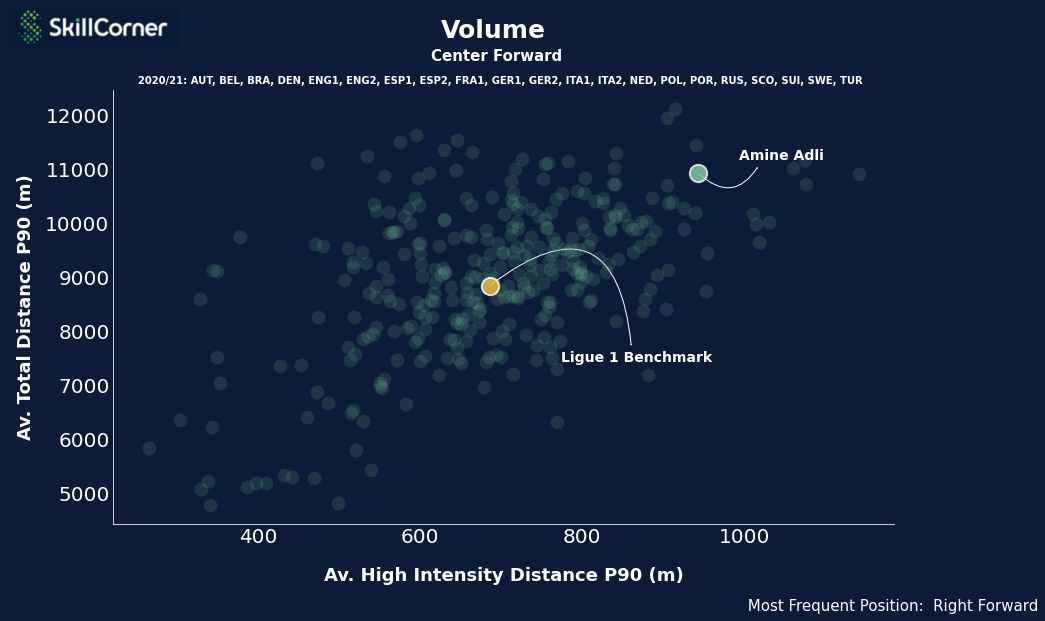

In [12]:
#############################################################

#### Report 1: High Intensity Distance vs Total Distance ####

#############################################################

from matplotlib.patches import FancyArrowPatch

font = FontProperties()

player_name = "Amine Adli"
Main_Header = "Volume"
Sub_Header= "Center Forward"
sub_sub_Header= "2020/21: AUT, BEL, BRA, DEN, ENG1, ENG2, ESP1, ESP2, FRA1, GER1, GER2, ITA1, ITA2, NED, POL, POR, RUS, SCO, SUI, SWE, TUR"

df['High Intensity Distance'] = df['HSR Distance'] + df['Sprinting Distance']

#title_font = font.set_family('Montserrat')
#body_font = font.set_name('Montserrat')

csfont = {'fontfamily':'Montserrat'}

plt.rcParams['font.family'] = 'Montserrat'

text_color = "w"
background = "#0C1B37"
filler = "#80CBA2"
primary = "white"
benchmark="#F6C243"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20


fig, ax = plt.subplots(figsize=(14,8))

fig.set_facecolor(background)
ax.patch.set_alpha(0)

x = df['High Intensity Distance'].tolist()
y = df['Distance'].tolist()

#### Adding all the players scatter points with an alpha value ####

ax.scatter(x,y,s=200,color=filler,edgecolors="black", alpha=0.15, lw=0.5, zorder=2,linewidths=2)


x = df[df.player_name == player_name]['High Intensity Distance'].tolist()
y = df[df.player_name == player_name].Distance.tolist()
t = df[df.player_name == player_name].player_name.tolist()

ax.scatter(x[-1],y[-1],s=300,color=filler,edgecolors="white", linewidths=2, alpha=0.8, zorder=4)


t = ax.text(x[-1]+155,y[-1]+250,t[-1],color=text_color,fontsize=14,fontweight="demibold", ha="right", **csfont)


### Adding League Average for Players ###

x1 = df[df['team']=='Ligue 1 Benchmark']['High Intensity Distance'].mean()
y1 = df[df['team']=='Ligue 1 Benchmark']['Distance'].mean()
o = df[df['team']=='Ligue 1 Benchmark'].team.tolist()

scatter2=ax.scatter(x1,y1,s=300,color=benchmark,edgecolors='white', linewidths=2, alpha=0.8, zorder=4)
o = ax.text(x1+275,y1-1400,o[-1],color=text_color,fontsize=14,fontweight="demibold", ha="right", **csfont)


#### Setting the axis labels ####

ax.set_xlabel("Av. High Intensity Distance P90 (m)", **csfont, fontweight="bold", fontsize=18, color=text_color,labelpad=20)
ax.set_ylabel("Av. Total Distance P90 (m)", **csfont, fontweight="bold", fontsize= 18, color=text_color,labelpad=10)

ax.tick_params(axis="both",length=0)

#### Hiding the spines of the patch added ####

spines = ["top","right","bottom","left"]
for s in spines:
    if s in ["top","right"]:
        ax.spines[s].set_visible(False)
    else:
        ax.spines[s].set_color(text_color)

        
fig.text(0.45,0.97,Main_Header,fontweight="bold", fontsize=25,**csfont, color=text_color)
fig.text(0.44,0.93,Sub_Header,fontweight="bold", fontsize=15,**csfont, color=text_color)
fig.text(0.15,0.89,sub_sub_Header,fontweight="bold", fontsize=10,**csfont, color=text_color)



#### Adding Skill corner badge ####
ax2 = fig.add_axes([0.02,0.9,0.17,0.17]) # badge
img = mpimg.imread(r'C:\Users\Home\Pictures\skillcorner.jpg')
ax2.imshow(img)

fig.text(0.75, -0.025, " Most Frequent Position:  "+str(Full_position),fontsize=15, **csfont, color=text_color)


### Set arrow for Main Player ###
t=FancyArrowPatch((x[-1],y[-1]), (x[-1]+75,y[-1]+150),connectionstyle='arc3,rad=0.6',arrowstyle='->',fc='white')
t.set_color('white')
ax.add_patch(t)

### Set arrow for League Benchmark ###
k=FancyArrowPatch((x1,y1), (x1+175,y1-1150),connectionstyle='arc3,rad=-.9',arrowstyle='->',fc='white')
k.set_color('white')
ax.add_patch(k)

### Turn off the grids ###
ax.grid(False)
ax2.axis("off")
plt.axis("off")

#plt.tight_layout()
plt.show()


In [ ]:
#############################################################

#### Report 1: High Intensity Distance vs Total Distance ####

#############################################################

from matplotlib.patches import FancyArrowPatch

font = FontProperties()

player_name = "Amine Adli"
Main_Header = "Volume"
Sub_Header= "Center Forward"
sub_sub_Header= "2020/21: AUT, BEL, BRA, DEN, ENG1, ENG2, ESP1, ESP2, FRA1, GER1, GER2, ITA1, ITA2, NED, POL, POR, RUS, SCO, SUI, SWE, TUR"

df['High Intensity Distance'] = df['HSR Distance'] + df['Sprinting Distance']

#title_font = font.set_family('Montserrat')
#body_font = font.set_name('Montserrat')

csfont = {'fontfamily':'Montserrat'}

plt.rcParams['font.family'] = 'Montserrat'

text_color = "w"
background = "#0C1B37"
filler = "#80CBA2"
primary = "white"
benchmark="#F6C243"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20


fig, ax = plt.subplots(figsize=(14,8))

fig.set_facecolor(background)
ax.patch.set_alpha(0)

x = df['High Intensity Distance'].tolist()
y = df['Distance'].tolist()

#### Adding all the players scatter points with an alpha value ####

ax.scatter(x,y,s=200,color=filler,edgecolors="black", alpha=0.15, lw=0.5, zorder=2,linewidths=2)


x = df[df.player_name == player_name]['High Intensity Distance'].tolist()
y = df[df.player_name == player_name].Distance.tolist()
t = df[df.player_name == player_name].player_name.tolist()

ax.scatter(x[-1],y[-1],s=300,color=filler,edgecolors="white", linewidths=2, alpha=0.8, zorder=4)


t = ax.text(x[-1]+155,y[-1]+250,t[-1],color=text_color,fontsize=14,fontweight="demibold", ha="right", **csfont)


### Adding League Average for Players ###

x1 = df[df['team']=='Ligue 1 Benchmark']['High Intensity Distance'].mean()
y1 = df[df['team']=='Ligue 1 Benchmark']['Distance'].mean()
o = df[df['team']=='Ligue 1 Benchmark'].team.tolist()

scatter2=ax.scatter(x1,y1,s=300,color=benchmark,edgecolors='white', linewidths=2, alpha=0.8, zorder=4)
o = ax.text(x1+275,y1-1400,o[-1],color=text_color,fontsize=14,fontweight="demibold", ha="right", **csfont)


#### Setting the axis labels ####

ax.set_xlabel("Av. High Intensity Distance P90 (m)", **csfont, fontweight="bold", fontsize=18, color=text_color,labelpad=20)
ax.set_ylabel("Av. Total Distance P90 (m)", **csfont, fontweight="bold", fontsize= 18, color=text_color,labelpad=10)

ax.tick_params(axis="both",length=0)

#### Hiding the spines of the patch added ####

spines = ["top","right","bottom","left"]
for s in spines:
    if s in ["top","right"]:
        ax.spines[s].set_visible(False)
    else:
        ax.spines[s].set_color(text_color)

        
fig.text(0.45,0.97,Main_Header,fontweight="bold", fontsize=25,**csfont, color=text_color)
fig.text(0.44,0.93,Sub_Header,fontweight="bold", fontsize=15,**csfont, color=text_color)
fig.text(0.15,0.89,sub_sub_Header,fontweight="bold", fontsize=10,**csfont, color=text_color)



#### Adding Skill corner badge ####
ax2 = fig.add_axes([0.02,0.9,0.17,0.17]) # badge
img = mpimg.imread(r'C:\Users\Home\Pictures\skillcorner.jpg')
ax2.imshow(img)

fig.text(0.75, -0.025, " Most Frequent Position:  "+str(Full_position),fontsize=15, **csfont, color=text_color)


### Set arrow for Main Player ###
t=FancyArrowPatch((x[-1],y[-1]), (x[-1]+75,y[-1]+150),connectionstyle='arc3,rad=0.6',arrowstyle='->',fc='white')
t.set_color('white')
ax.add_patch(t)

### Set arrow for League Benchmark ###
k=FancyArrowPatch((x1,y1), (x1+175,y1-1150),connectionstyle='arc3,rad=-.9',arrowstyle='->',fc='white')
k.set_color('white')
ax.add_patch(k)

### Turn off the grids ###
ax.grid(False)
ax2.axis("off")
plt.axis("off")

#plt.tight_layout()
plt.show()


In [44]:
premier_league.to_csv(r'C:\Users\Home\Documents\Prem.csv')

In [ ]:
df.columns.get_loc("HSR Distance")

In [ ]:
df.position.value_counts()

In [ ]:
df.columns